Реализовать высокочастотную фильтрацию на основе ядра Гаусса

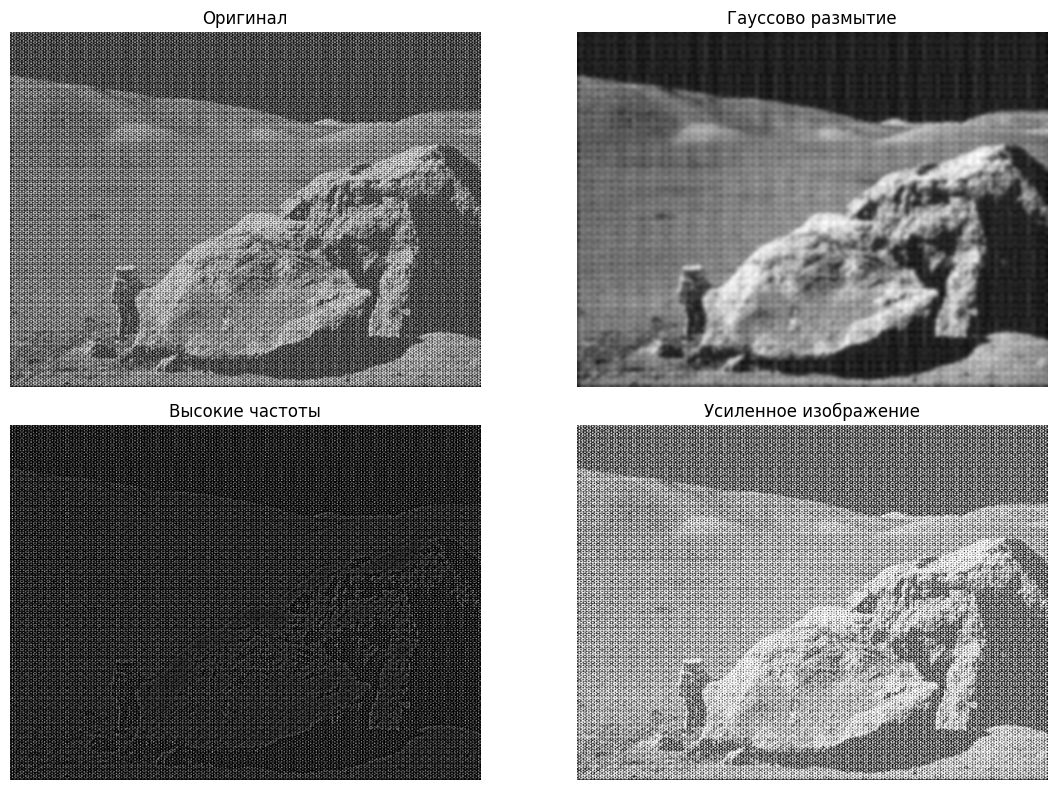

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("periodic_noise.JPG")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (0, 0), 3)

high_freq = cv2.subtract(gray, blurred)

enhanced = cv2.addWeighted(gray, 1.5, high_freq, 0.5, 0)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Оригинал")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Гауссово размытие")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(high_freq, cmap='gray')
plt.title("Высокие частоты")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(enhanced, cmap='gray')
plt.title("Усиленное изображение")
plt.axis('off')

plt.tight_layout()
plt.show()

Реализовать удаление периодического шума

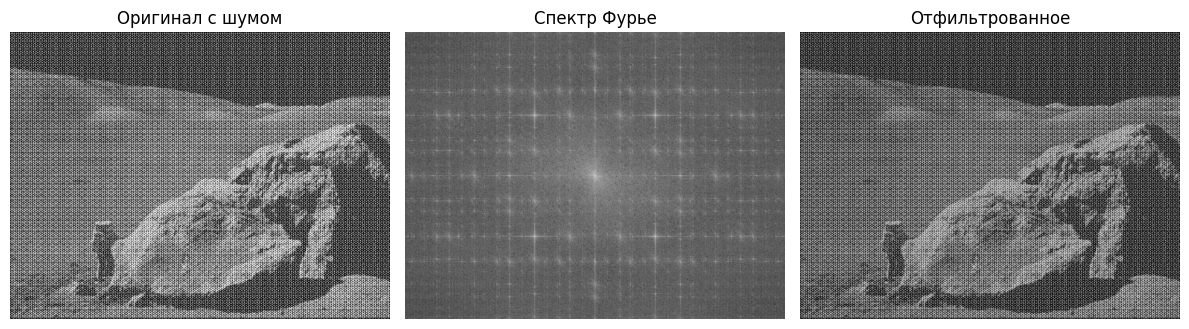

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("periodic_noise.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Преобразование Фурье
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols, 2), np.uint8)

r = 10
mask[crow-r:crow+r, ccol-r:ccol+r] = 1  

mask[0:50, :] = 0
mask[-50:, :] = 0
mask[:, 0:50] = 0
mask[:, -50:] = 0

fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
img_back = np.uint8(img_back)

# Визуализация
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Оригинал с шумом")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Спектр Фурье")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title("Отфильтрованное")
plt.axis('off')

plt.tight_layout()
plt.show()